
# **Earthquakes in California and Alaska**  

** Dennis Kafura **  
Introduction to Computational Thinking  
Final Project

### Introduction

California and Alaska are two earthquake prone states in the United States. Since they are geographically separated I am interested in comparing the characteristics of earthquakes in these two states. Data is available to study earthquakes in these two states from the United States Geological Survey. 


### Abstraction

Abstraction is the process of representing real world entities by quantitative information, or properties, from the viewpoint of a stakeholder interested in answering questions about the real world entity. The **abstraction of earthquakes** used in this project is a list of  reports about each earthquake. Each report contains the following quantitative information:

+ _Magnitude_: is a property of type float that represents the strength of the earthquake. Magnitudes are usually in the range of of 0.0 to 10.0.

+ _Depth_: is a property of type float that represents how deep in the earth the earthquake occurred. This unit of this data is in miles.

+ _Location Name_: is a property of type string that represents the name of the area where the earthquak occurred. In this project we will only be interested in locations that are in either California or Alaska.


### Questions

California and Alaska are two earthquake prone states in the United States. These two states make an intersting comparison because they are geographically separated but both are affected by the tectonic plates on the Pacific rim. The analysis of the earthquake data stream will answer the following questions:

1. What is the distribution of of earthquake magnitudes in Alaska and California?
2. What is the relationship between earthquakes' depth and magnitude in Alaska vs. California?
3. On average, are earthquakes worse in Alaska or California?

The first question gives insight into whether earthquakes of all magnitudes are equally likely or if there is a greater likelihood of some range of magnitudes than others. The answer to the second question yields information on the nature of earthquake formations. Do more intense earthquakes occur deeper in the earth’s crust? Are deeper earthquakes associated with particular geographic regions (i.e., California vs. Alaska)? The answer to the third question allows us to see the whether one of the two states is generally impacted more by earthquakes than the other.

These questions are important for several reasons. First, earthquakes have the potential for great damage and loss of life. Earthquakes are also highly unpredictable, lending importance to any insight into their pattern of occurrence. In addition, many people are potentially interested in the answers to these questions. For example, earthquake analysis is useful to scientists, government planners, businesses, and the general public. Earth scientists are interested in the general phenomenon of earthquakes in an attempt to better explain, and ultimately predict, their occurrence. Government planners need to consider the potential effects of earthquakes in developing critical infrastructure for power generation, water distribution, transportation, etc. Government planners are also concerned with the development of building codes that need to account for potential earthquake stress. Business may avail themselves of earthquake risks in deciding on siting of facilities and insurance coverage.

### Limitations

The conclusions from this study are primarily limited by the duration of the time period represented by the data stream being analyzed. The data stream contains only information on earthquakes for the most recent month. This limited period of time may not be representative of the pattern or nature of earthquakes over a longer period of time. For example, if the most recent month was a relatively quiet period of time in an otherwise earthquake prone area then the results of this study would not properly reflect the geographic distribution of earthquakes. A second limitation is that only the state or country is being considered in this analysis so that questions about cities or regions smaller than a country cannot be answered.
There are several aspects of the data set that limit the type of accuracy of questions that it can be used to answer. Two of these are:
    

### Data Set

The data about earthquakes for a one month period can be obtained as follows:

In [5]:
import earthquakes

#get all earthquake reports
quakes = earthquakes.get_earthquakes()

### Structure

The data map in the diagram below shows the structure of the Earthquake data set. The entire data set is a list of dictionaries. Each element of the list describes a single earthquakes. The properties of interest in this project are shown by the red circles. these are:

* "magnitude": a key having a float value that is the magnitude of the earthquake. This key-value pair is in a dictionary accessed by the key "impact".
* "depth": a key having a float value that is the depth (in miles) of the earthquake. This key-value pair is in a dictionary accessed by the key "location".
* "name": is a key having a string value that gives the approximate area in which the earthquake occurred. Contained in this string is the name of the U.S. state or country in which the earthquake occurred. This key-value pair is in a dictionary accessed by the key "location".


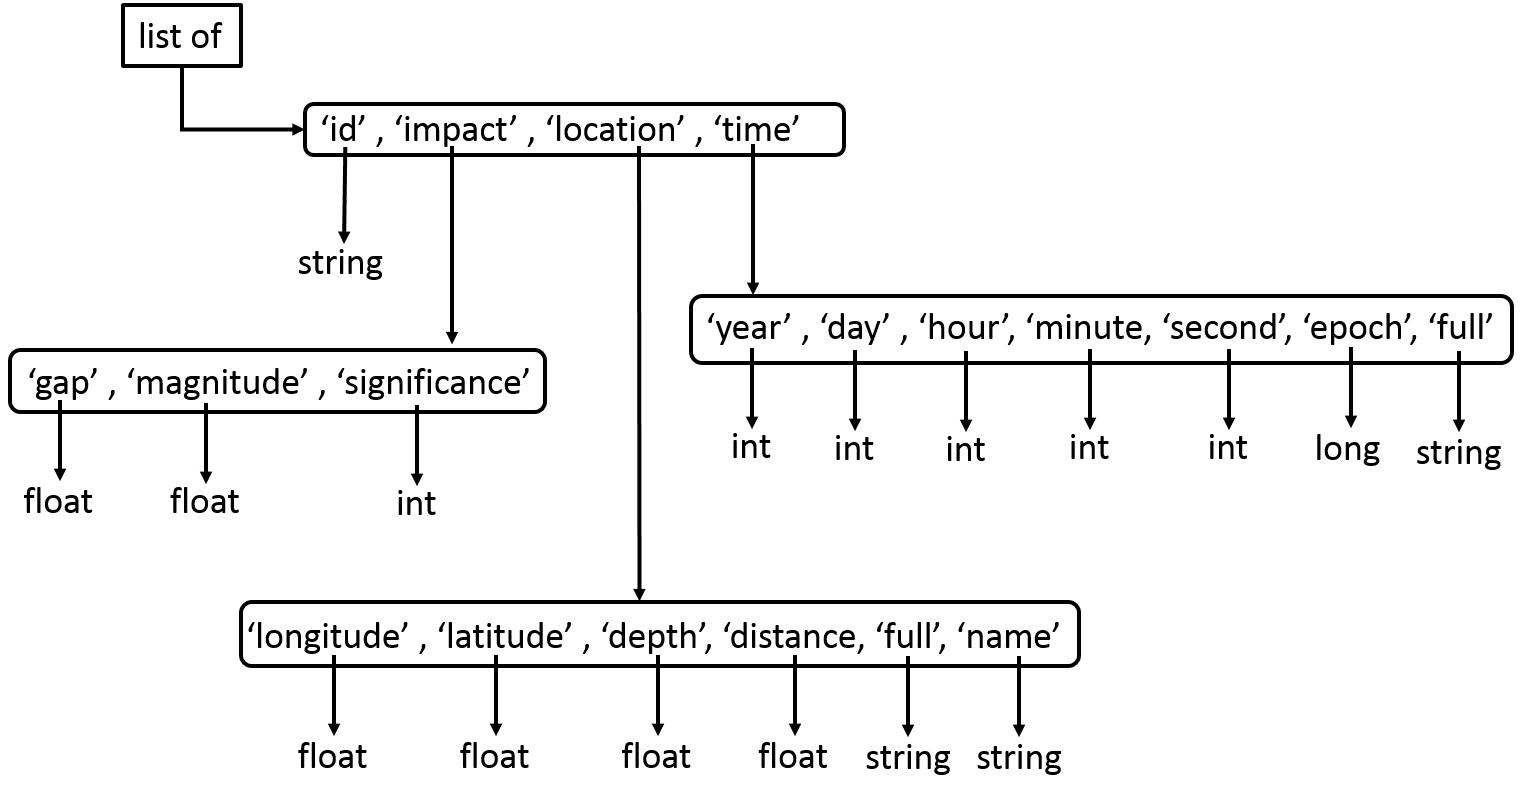

### Question 1

One way to characterize the earthquakes in the two states is by the following questions:    

**What is the distribution of of earthquake magnitudes in Alaska and California?**    

Answering this question involves comparing the histograms of earthquake magnitudes for each state.

The following two code blocks generate the two visualizations.


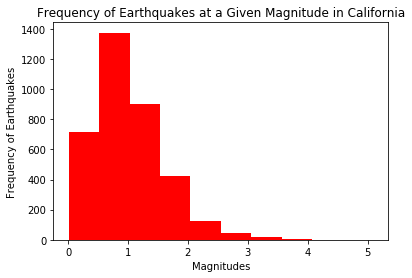

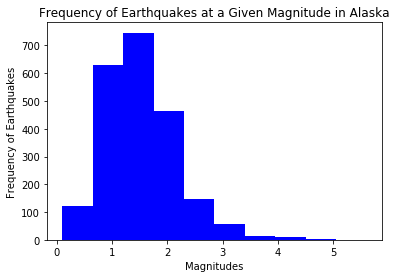

In [6]:
import matplotlib.pyplot as plt

# Generate a list of magnitudes for earthquakes in California and Alaska

CA_magnitudes = []
AS_magnitudes = []

for quake in quakes:
    if ('California' in quake['location']['name']):
        CA_magnitudes.append(quake['impact']['magnitude'])
    if ('Alaska' in quake['location']['name']):
        AS_magnitudes.append(quake['impact']['magnitude'])

# Plot histogram of magnitudes of California
plt.hist(CA_magnitudes, color='red')

#Label Axis
plt.xlabel('Magnitudes')
plt.ylabel('Frequency of Earthquakes')
plt.title('Frequency of Earthquakes at a Given Magnitude in California')
plt.show()

# Plot histogram of magnitudes for Alaska
plt.hist(AS_magnitudes, color='blue')

# Label Axis
plt.xlabel('Magnitudes')
plt.ylabel('Frequency of Earthquakes')
plt.title('Frequency of Earthquakes at a Given Magnitude in Alaska')
plt.show()


### Answer to Question 1

The histograms above show that both California and Alaska have relatively low magnitude earthquakes and tend not to have very many high magnitude earthquakes. You can also see California has more very small (magnitude below 1) earthquakes than does Alaska. Also, in this data the peak frequency for California earthquakes is just below magnitdue 1 while for Alaska the peak frequency is between magnitudes of 1 and 2.

### Question 2

A second comparison of the earthquake characteristics between California and Alaska is whether there is an difference in their depth and magnitudes. This is captured by the following question:

**What is the relationship between earthquakes' depth and magnitude in Alaska vs. California?**

The following code produces a single scatter plot to show the relationship in each state. The data points are color-coded so that points for the two states can be differentiated.

Because we have already created above the list of magnitudes for each state it is only necessary to find the corresponding list of depths for each state.


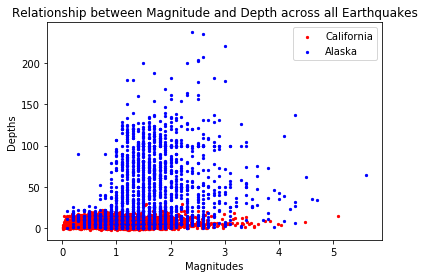

In [7]:


# Generate a list of depths
CA_depths = []
AS_depths = []

for quake in quakes:
    if ('California' in quake['location']['name']):
        CA_depths.append(quake['location']['depth'])
    if ('Alaska' in quake['location']['name']):
        AS_depths.append(quake['location']['depth'])

# Plot histogram of magnitudes vs. depths
plt.scatter(CA_magnitudes, CA_depths, color='red', s=5, label="California")
plt.scatter(AS_magnitudes, AS_depths, color='blue', s=5, label="Alaska")
                         
# Label Axis
plt.xlabel('Magnitudes')
plt.ylabel('Depths')
plt.title('Relationship between Magnitude and Depth across all Earthquakes')
plt.legend()
plt.show()

### Answer to  Question 2

As can be seen in the scatter plot, both states have the same range of magnitudes but Alaska has much deeper earthquakes in comparison with California. While California earthquakes occur close to the surface, within 25 miles of depth, those in Alaska can be much deeper with some over 200 miles in depth. Also, there does not appear to be a relationship in either state between magnitude and depth.


### Question 3

A third way to compare seimic activity in Alaska and California is by asking:

** On average, are earthquakes worse in Alaska or California?**

This question will be answered by comparing the total number and average magnitude of earthquakes in the two states.


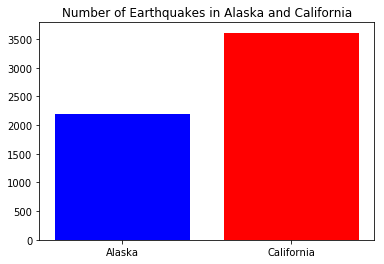

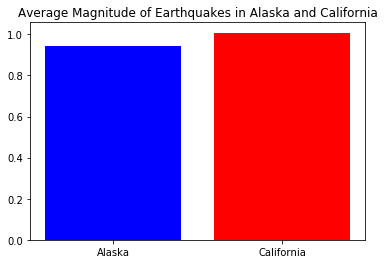

In [8]:
# determine the number of earthquakes in each state

CA_number_earthquakes = 0
CA_total_magnitude = 0
AS_number_earthquakes = 0
AS_total_magnitude = 0

for magnitude in CA_magnitudes:
    CA_number_earthquakes = CA_number_earthquakes + 1
    CA_total_magnitude = CA_total_magnitude + magnitude
CA_average_magnitude = CA_total_magnitude / CA_number_earthquakes

for magnitude in AS_magnitudes:
    AS_number_earthquakes = AS_number_earthquakes + 1
    AS_total_magnitude = AS_total_magnitude + magnitude
AS_average_magnitude = AS_total_magnitude / CA_number_earthquakes

# create bar charts of these quantitative measures

number_earthquakes = [AS_number_earthquakes, CA_number_earthquakes]
average_magnitudes = [AS_average_magnitude, CA_average_magnitude]
state_names = ['Alaska', 'California']
state_colors = ['blue', 'red']
bar_locations = [0,1]

plt.bar(bar_locations, number_earthquakes, tick_label=state_names, color=state_colors, align='center')
plt.title('Number of Earthquakes in Alaska and California')
plt.show()

plt.bar(bar_locations, average_magnitudes, tick_label=state_names, color=state_colors, align='center')
plt.title('Average Magnitude of Earthquakes in Alaska and California')
plt.show()
    

### Answer to Question 3

The bar chart comparing the number of earthquakes shows that California has significantly more earthquakes than Alaska. California has approximately 3500 earthquakes while Alaska has only slightly more than 2000.  However, the average earthquake magnitude is little different in Alaka and California. Both states have an average magnitude of slightly below 1.0.



### Social Impacts

Various stakeholders would be intereted in the results of this analysis:

* **People looking to move** would be interested in knowing which state is safer, or whetheer northern or southern states would be safer in general.
* **Policy makers** allocating fuding for disaster relief might want to know which areas get more severe earthquakes to better allocate the funds.

* **Real estate developers** might want to know whether it is better to build in Alaska or California.

There are also potential conflicts between these stakeholders:

* Real estate developers might not want potential customers to know how many earthquakes occur in these locations, since it might affect their sales.
* Policy makers might want to discourage poeplle looking to move from living in one of these areas, to reduce the total amount of funding neeeded for disaster relief.


### Honor Code Statement

I have neither given nor received unathorized assistance on this project.